In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Import customer segment data set
data = pd.read_csv('/Users/AdMiN/Desktop/Data Science Projects/Customer Segment Practice/Mall_Customers.csv')

In [2]:
#View data set
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(data.shape)

(200, 5)


In [4]:
#Check Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Check data for missing value
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Statistic Summary for data set
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


from statistic summary we will see avg age of customer is 39 yrs and youngest customer 18 yrs/ Oldest 70 normal range of customer is between 20-56 yrs. In case of ann income, avg is 60k the normal range 34k-86k.

# Exploratory Data Analysis

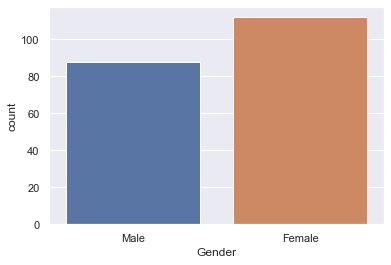

In [7]:
#Check Univariant for customer sex
sns.countplot(x='Gender', data=data)

Text(0.5, 0, 'Age')

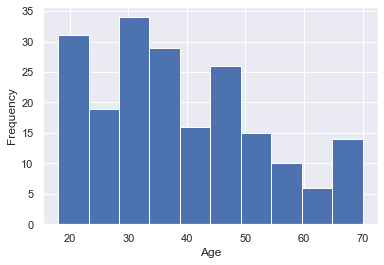

In [10]:
#Distribution of Customer Age
data['Age'].plot.hist()
plt.xlabel('Age')

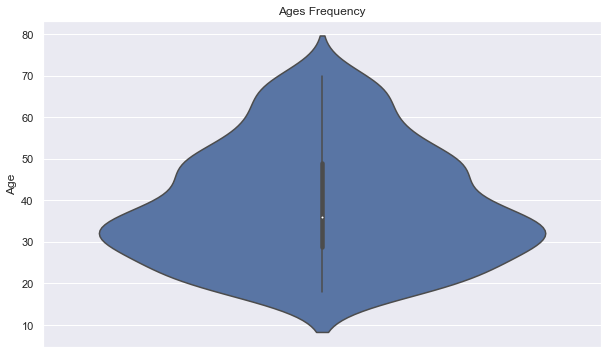

In [12]:
#Violin Plot for Age
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=data['Age'])
plt.show()

Text(0.5, 0, 'Annual Income (k$)')

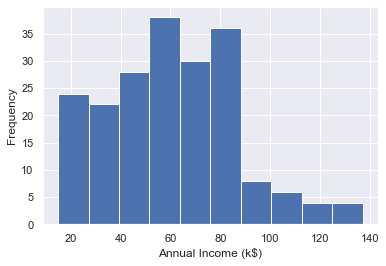

In [15]:
#Distribution of Annual Income
data['Annual Income (k$)'].plot.hist()
plt.xlabel('Annual Income (k$)')

Text(0.5, 0, 'Spending Score (1-100)')

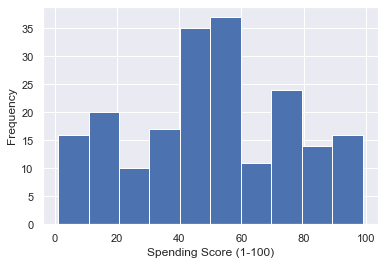

In [16]:
#Distribution of Spending Score
data['Spending Score (1-100)'].plot.hist()
plt.xlabel('Spending Score (1-100)')

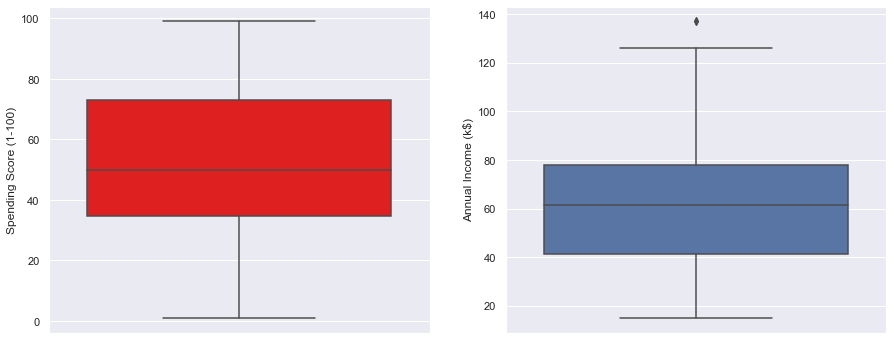

In [18]:
#Find outlier of Spending Score and Annual Income
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["Annual Income (k$)"])

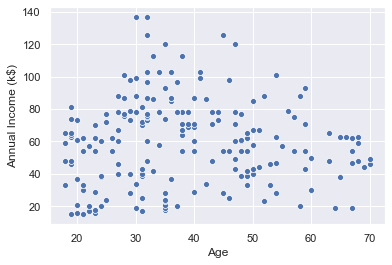

In [19]:
#Check Bivariant Correlation Age and Annual Income
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data)

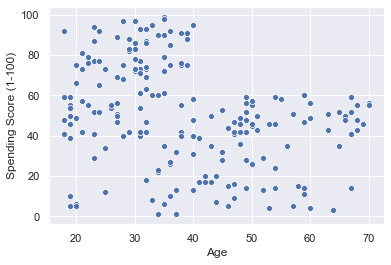

In [20]:
#Check Bivariant Correlation Age and Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data)

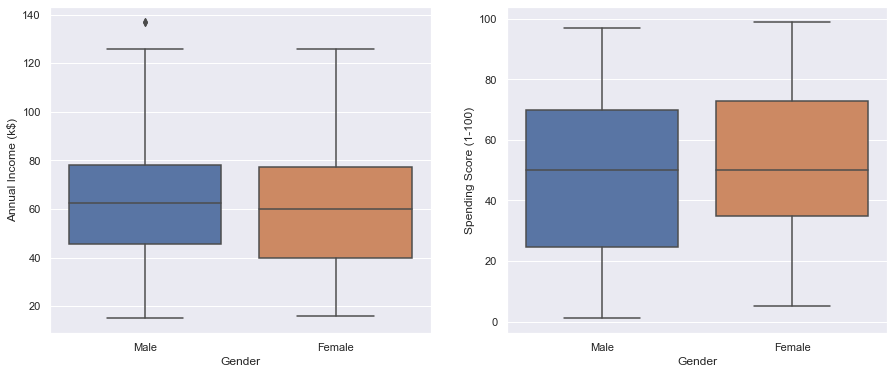

In [27]:
#Check Bivariant Gender and Annual Income/ Gender and Spending Score Box Plot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y='Annual Income (k$)', x='Gender', data=data)
plt.subplot(1,2,2)
sns.boxplot(y='Spending Score (1-100)', x='Gender', data=data)

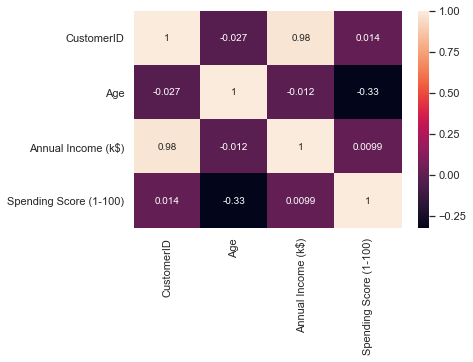

In [28]:
#Correlation Matrix with all features
data.corr()
sns.heatmap(data.corr(), annot=True)

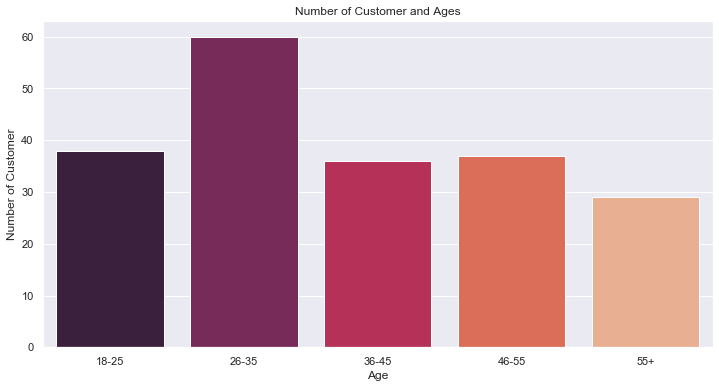

In [35]:
#Grouping Age to see distribution 
age18_25 = data['Age'][(data.Age>=18)&(data.Age<=25)]
age26_35 = data['Age'][(data.Age>=26)&(data.Age<=35)]
age36_45 = data['Age'][(data.Age>=36)&(data.Age<=45)]
age46_55 = data['Age'][(data.Age>=46)&(data.Age<=55)]
age55above  = data['Age'][(data.Age>=56)]

#Define x and y 
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

#Plot Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(x=x, y=y, palette='rocket')
plt.title('Number of Customer and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

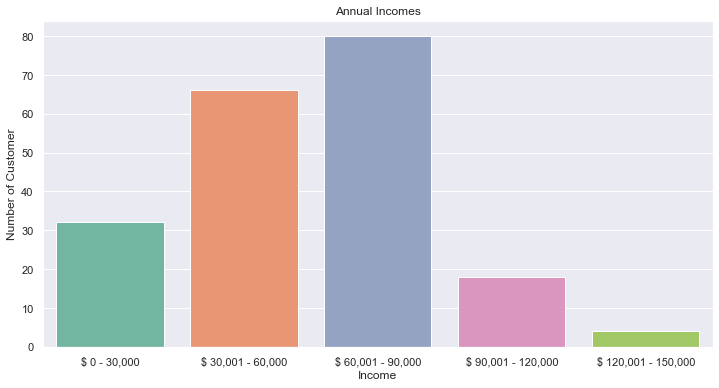

In [41]:
#Grouping Annual Income to see Distribution

ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

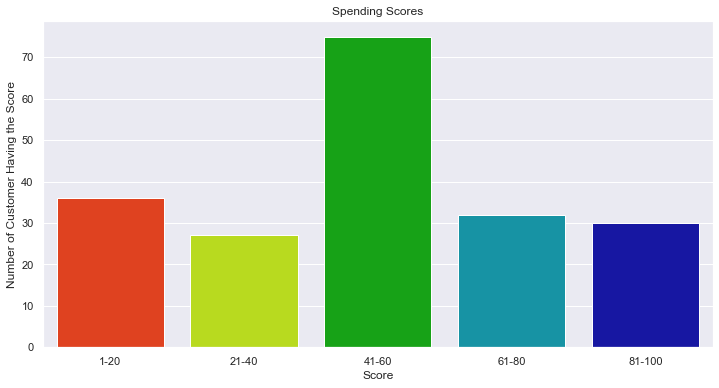

In [45]:
#Grouping spending score to see distribution

ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

In [71]:
#Prepare data to ready for analysis
#Drop Customer ID and Gender column
df = data.drop(['CustomerID','Gender'], axis=1)

In [72]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# KMeans Elbow Method

Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

Within-Cluster-Sum of Squared Errors sounds a bit complex. Let’s break it down:
The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
The WSS score is the sum of these Squared Errors for all the points.
Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.

In [73]:
#Change data type to array 
X = np.array(df.astype(float))

In [74]:
#Build Kmeans Model
from sklearn.cluster import KMeans

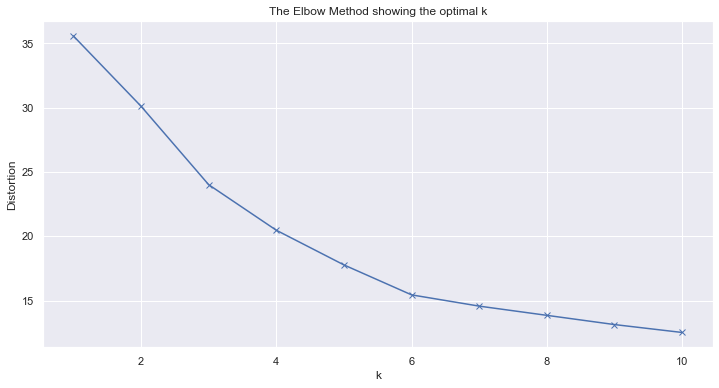

In [75]:
#Find Suitable K for Titanic Data Set if we do not know how they are classified
# k means determine k
from scipy.spatial.distance import cdist

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / len(X))

# Plot the elbow
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

After we perform Elbow Method, we got k = 5 and then use this value to fit with our data

In [76]:
#Standard Scaler for our data set before fit to the model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
#Modeling
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
df['label'] = kmeans.labels_

In [84]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),label
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2


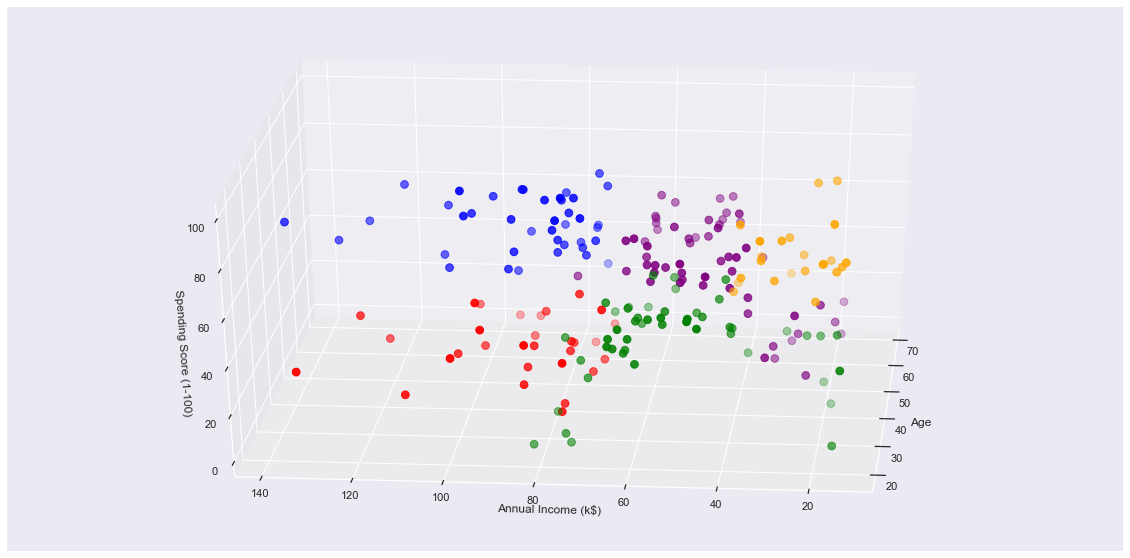

In [85]:
#3D Plot for Classifier Customoer Segment
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()